In [1]:
# Q1 — Logic Gates: AND (Feed-forward NN)
import numpy as np
# AND Gate dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([0, 0, 0, 1])

# Initialize weights & bias
weights = np.random.randn(2)
bias = np.random.randn()

# Sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Training
lr = 0.1  # learning rate
epochs = 10000

for _ in range(epochs):
    for i in range(len(X)):
        # Forward pass
        z = np.dot(X[i], weights) + bias
        pred = sigmoid(z)

        # Error
        error = y[i] - pred

        # Weight update (Gradient Descent)
        weights += lr * error * X[i]
        bias += lr * error

# Testing Model
print("Final Weights:", weights)
print("Final Bias:", bias)

print("\nPredictions:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    pred = sigmoid(z)
    print(f"{X[i]} -> {round(pred)} (sigmoid={pred:.4f})")




Final Weights: [10.23325201 10.23262181]
Final Bias: -15.517523736794507

Predictions:
[0 0] -> 0 (sigmoid=0.0000)
[0 1] -> 0 (sigmoid=0.0050)
[1 0] -> 0 (sigmoid=0.0050)
[1 1] -> 1 (sigmoid=0.9930)


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


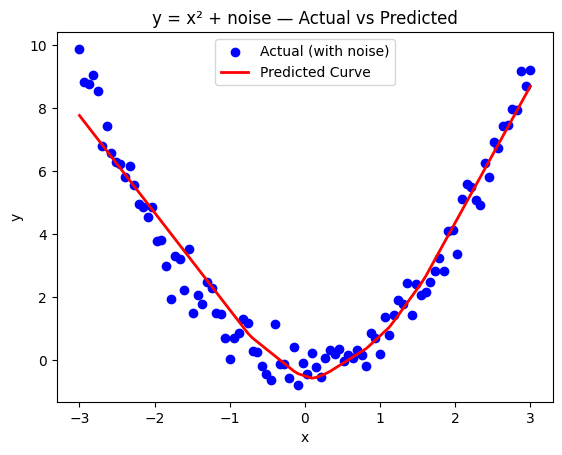

Training complete!


In [2]:
# Q2 — Regression: y = x² + noise (100 samples)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# 1. Generate 100 samples in range [-3, 3]
np.random.seed(0)
x = np.linspace(-3, 3, 100).reshape(-1, 1)
noise = np.random.normal(0, 0.5, x.shape)
y = x**2 + noise  # true function + noise

# 2. Build Neural Network Model
model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu',
                     solver='adam', max_iter=2000, random_state=0)

# Train the model
model.fit(x, y.ravel())

# 3. Predict
y_pred = model.predict(x)

# 4. Plot actual vs predicted
plt.scatter(x, y, label="Actual (with noise)", color="blue")
plt.plot(x, y_pred, label="Predicted Curve", linewidth=2, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x² + noise — Actual vs Predicted")
plt.legend()
plt.show()

print("Training complete!")


Activation: logistic → Accuracy: 0.50
Activation: tanh → Accuracy: 1.00
Activation: relu → Accuracy: 1.00


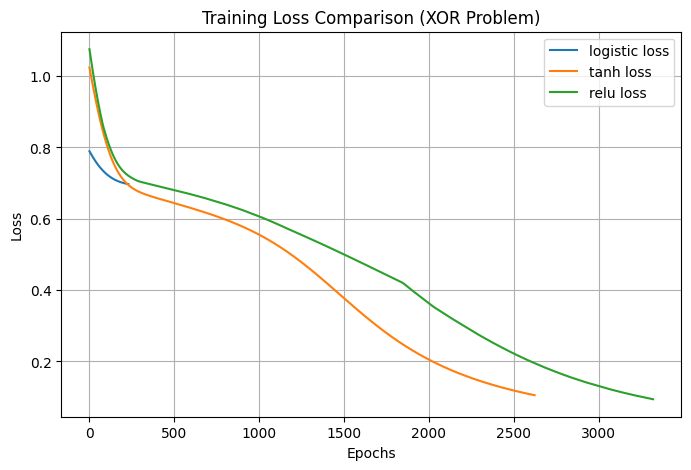

In [3]:
# Q3 — XOR gate with different activations (sigmoid, tanh, relu)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

activations = ['logistic', 'tanh', 'relu']  # sigmoid, tanh, relu
results = {}

for act in activations:
    model = MLPClassifier(hidden_layer_sizes=(4,), activation=act,
                          solver='adam', max_iter=5000, random_state=0)
    model.fit(X, y)
    
    accuracy = model.score(X, y)
    loss_curve = model.loss_curve_
    
    results[act] = (accuracy, loss_curve)
    print(f"Activation: {act} → Accuracy: {accuracy:.2f}")

# Plot loss curves
plt.figure(figsize=(8,5))
for act in activations:
    plt.plot(results[act][1], label=f'{act} loss')
plt.title("Training Loss Comparison (XOR Problem)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Q4 — Binary Classification: Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Load Dataset
data = load_breast_cancer()
X = data.data        # Features
y = data.target      # Labels (0 = malignant, 1 = benign)

# 2. Split into Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Build Neural Network Model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2000, random_state=0)

# 4. Train Model
model.fit(X_train, y_train)

# 5. Predict on Test Data
y_pred = model.predict(X_test)

# 6. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9473684210526315


In [5]:
# Q5 — Multi-Class Classification: Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Build Neural Network Model
model = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='adam', max_iter=500)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")




Accuracy: 96.67%


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Q6 — Regression: California Housing (House Price Prediction)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Test model
score = model.score(X_test, y_test)   # R² score
print("Model Accuracy (R² Score):", score)



Model Accuracy (R² Score): 0.5870417961107983


In [7]:
# Q7 — MNIST with Dropout Regularization (prevent overfitting)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Step 1: Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Normalize Pixel Values (0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 3: One-Hot Encode Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 4: Build Neural Network with Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),            # Dropout to prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),            # Dropout again
    Dense(10, activation='softmax')   # Output Layer
])

# Step 5: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Step 7: Evaluate Model on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8883 - loss: 0.3665 - val_accuracy: 0.9618 - val_loss: 0.1325
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9502 - loss: 0.1644 - val_accuracy: 0.9660 - val_loss: 0.1112
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9623 - loss: 0.1227 - val_accuracy: 0.9710 - val_loss: 0.0933
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9692 - loss: 0.1024 - val_accuracy: 0.9724 - val_loss: 0.0987
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9732 - loss: 0.0865 - val_accuracy: 0.9764 - val_loss: 0.0791
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9751 - loss: 0.0787 - val_accuracy: 0.9758 - val_loss: 0.0821
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9779 - loss: 0.0700 - val_accuracy: 0.9776 - val_loss: 0.0792
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9794 - loss: 0.0645 - val_accuracy: 0.